**ANN Deep learning model to predict if a Cricket Match is BAT or BALL dominated**

**Necessary Importations of Libraries and Packages :**

In [141]:
import tensorflow as tensorfloww
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from google.colab import files
from keras.layers import LeakyReLU
import io

**Loading the Dataset :**

In [3]:
uploaded = files.upload()

Saving IPL Matches 2008-2020.csv to IPL Matches 2008-2020.csv


**Converting the Input dataset into .csv file :**

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['IPL Matches 2008-2020.csv']))

**Meta-data of the Dataset :**

In [5]:
print(df.shape)

(816, 17)


In [6]:
print(df.dtypes)

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object


In [7]:
print(df.head)

<bound method NDFrame.head of           id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                              Wa

In [8]:
print(df.corr(method = 'pearson'))

                     id  neutral_venue  result_margin
id             1.000000      -0.292042      -0.010501
neutral_venue -0.292042       1.000000      -0.006445
result_margin -0.010501      -0.006445       1.000000


**Data Preparation and Data cleaning :**

In [9]:
df.loc[(df.toss_decision == 'bat'),'toss_decision'] = 1
df.loc[(df.toss_decision == 'field'),'toss_decision'] = 0

In [10]:
print(df['toss_decision'])
df['toss_decision'] = df['toss_decision'].astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
811    0
812    0
813    0
814    1
815    1
Name: toss_decision, Length: 816, dtype: object


In [131]:
df.loc[(df.result == 'runs'),'result'] = 1
df.loc[(df.result == 'wickets'),'result'] = 0
df.loc[(df.result == 'tie'),'result'] = 1
df.loc[(df.eliminator == 'N'),'eliminator'] = 0
df.loc[(df.eliminator == 'Y'),'eliminator'] = 1

In [12]:
print(df['result'])

0      1
1      1
2      0
3      0
4      0
      ..
811    2
812    1
813    0
814    1
815    0
Name: result, Length: 816, dtype: object


In [13]:
print(df['eliminator'])

0      0
1      0
2      0
3      0
4      0
      ..
811    1
812    0
813    0
814    0
815    0
Name: eliminator, Length: 816, dtype: object


In [14]:
df = df.drop(labels = ['method'],axis=1)

In [15]:
df = df.dropna()

In [16]:
print(df.shape)

(786, 16)


In [17]:
df['eliminator']  = df['eliminator'].astype(int)
df['result'] = df['result'].astype(int)

In [18]:
print(df['team1'].unique())
print(df['team2'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals']


**Unique ID assigned for every Individual Team :**

In [19]:
df.loc[(df.team1 == 'Royal Challengers Bangalore'),'team1'] = 1
df.loc[(df.team2 == 'Royal Challengers Bangalore'),'team2'] = 1
df.loc[(df.winner == 'Royal Challengers Bangalore'),'winner'] = 1
df.loc[(df.toss_winner == 'Royal Challengers Bangalore'),'toss_winner'] = 1
df.loc[(df.team1 == 'Kings XI Punjab'),'team1'] = 2
df.loc[(df.team2 == 'Kings XI Punjab'),'team2'] = 2
df.loc[(df.winner == 'Kings XI Punjab'),'winner'] = 2
df.loc[(df.toss_winner == 'Kings XI Punjab'),'toss_winner'] = 2
df.loc[(df.team1 == 'Delhi Daredevils'),'team1'] = 3
df.loc[(df.team2 == 'Delhi Daredevils'),'team2'] = 3
df.loc[(df.winner == 'Delhi Daredevils'),'winner'] = 3
df.loc[(df.toss_winner == 'Delhi Daredevils'),'toss_winner'] = 3
df.loc[(df.team1 == 'Mumbai Indians'),'team1'] = 4
df.loc[(df.team2 == 'Mumbai Indians'),'team2'] = 4
df.loc[(df.winner == 'Mumbai Indians'),'winner'] = 4
df.loc[(df.toss_winner == 'Mumbai Indians'),'toss_winner'] = 4
df.loc[(df.team1 == 'Kolkata Knight Riders'),'team1'] = 5
df.loc[(df.team2 == 'Kolkata Knight Riders'),'team2'] = 5
df.loc[(df.winner == 'Kolkata Knight Riders'),'winner'] = 5
df.loc[(df.toss_winner == 'Kolkata Knight Riders'),'toss_winner'] = 5
df.loc[(df.team1 == 'Rajasthan Royals'),'team1'] = 6
df.loc[(df.team2 == 'Rajasthan Royals'),'team2'] = 6
df.loc[(df.winner == 'Rajasthan Royals'),'winner'] = 6
df.loc[(df.toss_winner == 'Rajasthan Royals'),'toss_winner'] = 6
df.loc[(df.team1 == 'Deccan Chargers'),'team1'] = 7
df.loc[(df.team2 == 'Deccan Chargers'),'team2'] = 7
df.loc[(df.winner == 'Deccan Chargers'),'winner'] = 7
df.loc[(df.toss_winner == 'Deccan Chargers'),'toss_winner'] = 7
df.loc[(df.team1 == 'Chennai Super Kings'),'team1'] = 8
df.loc[(df.team2 == 'Chennai Super Kings'),'team2'] = 8
df.loc[(df.winner == 'Chennai Super Kings'),'winner'] = 8
df.loc[(df.toss_winner == 'Chennai Super Kings'),'toss_winner'] = 8
df.loc[(df.team1 == 'Kochi Tuskers Kerala'),'team1'] = 9
df.loc[(df.team2 == 'Kochi Tuskers Kerala'),'team2'] = 9
df.loc[(df.winner == 'Kochi Tuskers Kerala'),'winner'] = 9
df.loc[(df.toss_winner == 'Kochi Tuskers Kerala'),'toss_winner'] = 9
df.loc[(df.team1 == 'Pune Warriors'),'team1'] = 10
df.loc[(df.team2 == 'Pune Warriors'),'team2'] = 10
df.loc[(df.winner == 'Pune Warriors'),'winner'] = 10
df.loc[(df.toss_winner == 'Pune Warriors'),'toss_winner'] = 10
df.loc[(df.team1 == 'Sunrisers Hyderabad'),'team1'] = 11
df.loc[(df.team2 == 'Sunrisers Hyderabad'),'team2'] = 11
df.loc[(df.winner == 'Sunrisers Hyderabad'),'winner'] = 11
df.loc[(df.toss_winner == 'Sunrisers Hyderabad'),'toss_winner'] = 11
df.loc[(df.team1 == 'Gujarat Lions'),'team1'] = 12
df.loc[(df.team2 == 'Gujarat Lions'),'team2'] = 12
df.loc[(df.winner == 'Gujarat Lions'),'winner'] = 12
df.loc[(df.toss_winner == 'Gujarat Lions'),'toss_winner'] = 12
df.loc[(df.team1 == 'Rising Pune Supergiants'),'team1'] = 13
df.loc[(df.team2 == 'Rising Pune Supergiants'),'team2'] = 13
df.loc[(df.winner == 'Rising Pune Supergiants'),'winner'] = 13
df.loc[(df.toss_winner == 'Rising Pune Supergiants'),'toss_winner'] = 13
df.loc[(df.team1 == 'Rising Pune Supergiant'),'team1'] = 13
df.loc[(df.team2 == 'Rising Pune Supergiant'),'team2'] = 13
df.loc[(df.winner == 'Rising Pune Supergiant'),'winner'] = 13
df.loc[(df.toss_winner == 'Rising Pune Supergiant'),'toss_winner'] = 13
df.loc[(df.team1 == 'Delhi Capitals'),'team1'] = 3
df.loc[(df.team2 == 'Delhi Capitals'),'team2'] = 3
df.loc[(df.winner == 'Delhi Capitals'),'winner'] = 3
df.loc[(df.toss_winner == 'Delhi Capitals'),'toss_winner'] = 3

In [20]:
df['team1']  = df['team1'].astype(int)
df['team2']  = df['team2'].astype(int)
df['winner']  = df['winner'].astype(int)
df['toss_winner']  = df['toss_winner'].astype(int)

In [21]:
print(df.dtypes)

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1                int64
team2                int64
toss_winner          int64
toss_decision        int64
winner               int64
result               int64
result_margin      float64
eliminator           int64
umpire1             object
umpire2             object
dtype: object


In [22]:
df = df.drop(labels = ['id','date','city','player_of_match','venue','umpire1','umpire2'],axis=1);

In [23]:
print(df.dtypes)

neutral_venue      int64
team1              int64
team2              int64
toss_winner        int64
toss_decision      int64
winner             int64
result             int64
result_margin    float64
eliminator         int64
dtype: object


In [24]:
df['result_margin'] = df['result_margin'].astype(int)

**Plotting various Features of the data against the others selectively :**

AxesSubplot(0.125,0.125;0.775x0.755)


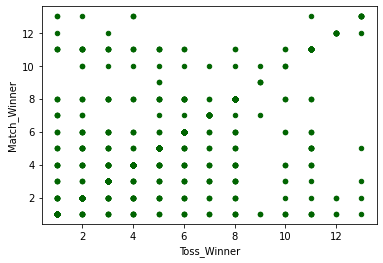

In [25]:
graph = df.plot(kind='scatter', x='toss_winner', y='winner', color = 'darkgreen')
graph.set_xlabel("Toss_Winner")
graph.set_ylabel("Match_Winner")
print(graph)

AxesSubplot(0.125,0.125;0.775x0.755)


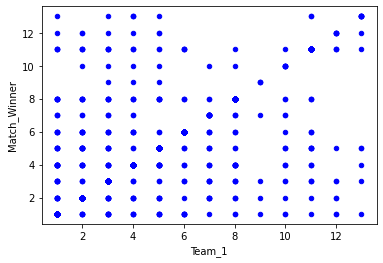

In [26]:
graph_2 = df.plot(kind='scatter', x='team1', y='winner', color = 'blue')
graph_2.set_xlabel("Team_1")
graph_2.set_ylabel("Match_Winner")
print(graph_2)

AxesSubplot(0.125,0.125;0.775x0.755)


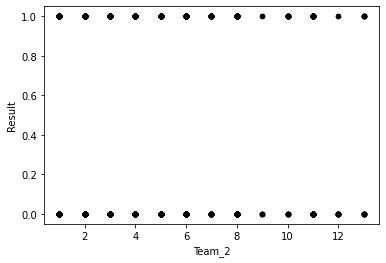

In [29]:
graph_3 = df.plot(kind='scatter', x='team2', y='result', color = 'black')
graph_3.set_xlabel("Team_2")
graph_3.set_ylabel("Result")
print(graph_3) 

**Deep Learning Artificial Neural Network :**

In [33]:
model = Sequential()
model.add(Dense(45, activation='sigmoid', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(21, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                405       
                                                                 
 dense_1 (Dense)             (None, 20)                920       
                                                                 
 dense_2 (Dense)             (None, 21)                441       
                                                                 
 dense_3 (Dense)             (None, 20)                440       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,227
Trainable params: 2,227
Non-trainable params: 0
_________________________________________________________________


In [132]:
X = df[['neutral_venue','team1','team2','toss_winner','toss_decision',
'result_margin','eliminator','winner']].values      
y = df['result'].values  
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 40)
X_train = tensorfloww.convert_to_tensor(X_train)
X_test = tensorfloww.convert_to_tensor(X_test)
y_train = tensorfloww.convert_to_tensor(y_train)
y_test = tensorfloww.convert_to_tensor(y_test)


In [133]:
model.compile(loss='mean_squared_error',optimizer=Adagrad(),metrics=['accuracy'])

In [134]:
x_validate = X_train
y_validate = y_train
early_stopping = EarlyStopping()
model.fit(X_train,y_train,epochs = 2,batch_size = 1,callbacks=[early_stopping],validation_data=(x_validate, y_validate))

Epoch 1/2
589/589 [==============================] - 3s 4ms/step - loss: 0.0659 - accuracy: 0.9236 - val_loss: 0.0652 - val_accuracy: 0.9253
Epoch 2/2
589/589 [==============================] - 3s 5ms/step - loss: 0.0656 - accuracy: 0.9253 - val_loss: 0.0649 - val_accuracy: 0.9253


**Deep-learning model's Scores :**

In [135]:
score = model.evaluate(X_test,y_test,verbose = 0)
print("Test-loss = ",score[0])
print("Test-accuracy = ",score[1])

Test-loss =  0.07671300321817398
Test-accuracy =  0.9086294174194336


**User-defined Test cases :**

In [139]:
Team_1 = 10
Team_2 = 13
result = model.predict([[0,Team_1,Team_2,Team_2,1,2,1,Team_1]])
if(abs(1-result)<abs(result-0)):
  print("This Cricket Match was Batsmen dominated !!! \n\n(BAT HEAVIED OVER THE BALL).")
else:
 print("This Cricket Match was Bowler dominated !!! \n\n(BALL HEAVIED OVER THE BAT).")

This Cricket Match was Bowler dominated !!! 

(BALL HEAVIED OVER THE BAT).


In [140]:
Team_1 = 11
Team_2 = 1
result = model.predict([[0,Team_1,Team_2,Team_2,1,2,1,Team_1]])
if(abs(1-result)<abs(result-0)):
  print("This Cricket Match was Batsmen dominated !!! \n\n(BAT HEAVIED OVER THE BALL).")
else:
 print("This Cricket Match was Bowler dominated !!! \n\n(BALL HEAVIED OVER THE BAT).")

This Cricket Match was Batsmen dominated !!! 

(BAT HEAVIED OVER THE BALL).
